**Практическое задание №3**

*Импорт гугл диска:*

```
# Выбран кодовый формат
```



In [216]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/Mydrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: 'gdrive/Mydrive'
/content


*Чтение файла с гугл диска:*

In [271]:
csv_file_path = '/content/gdrive/MyDrive/train.csv'

df = pd.read_csv(csv_file_path)


*Информация по файлу:*

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


*Сумма пропусков в файле:*

In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


*Количество пассажиров по классам:*

In [ ]:
df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


*Визуализация:*

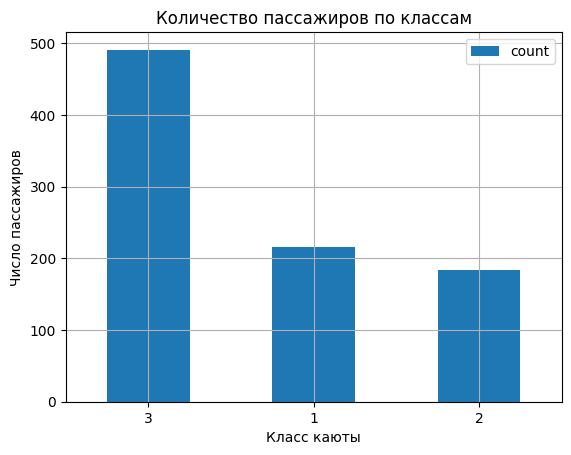

In [218]:
df['Pclass'].value_counts().plot(
    kind='bar',
    rot=0,
    title='Количество пассажиров по классам',
    xlabel='Класс каюты',
    ylabel='Число пассажиров',
    legend=True,
    grid=True,
);

*Список выживших по классам:*

In [ ]:
df.groupby('Pclass')['Survived'].sum()

,Survived
Pclass,
1,136
2,87
3,119


*Список пассажиров по классам:*

In [ ]:
df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


*Процент выживших по классам:*

In [ ]:
((df.groupby('Pclass')['Survived'].sum())/(df['Pclass'].value_counts())*100)    #Использовал стандартную формулу по поиску процентного соотношения.

,0
Pclass,
1,62.962963
2,47.282609
3,24.236253


*Визуализация:*

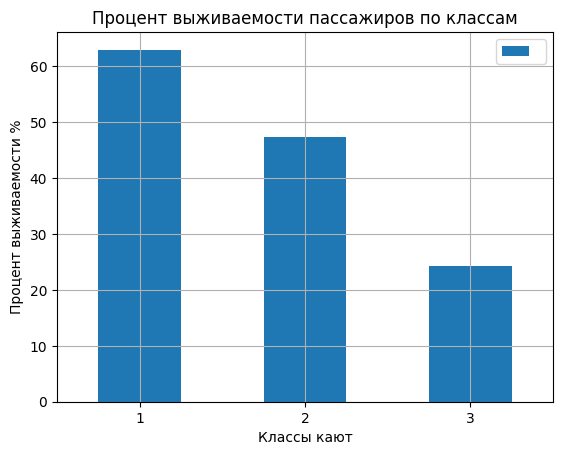

In [ ]:
((df.groupby('Pclass')['Survived'].sum())/(df['Pclass'].value_counts())*100).plot(
    kind='bar',
    rot=0,
    title='Процент выживаемости пассажиров по классам',
    xlabel='Классы кают',
    ylabel='Процент выживаемости %',
    legend=True,
    grid=True
);

*Общий список имен относительно пола:*

In [36]:
df.groupby('Sex')['Name'].value_counts()

Sex     Name                                          
female  Abbott, Mrs. Stanton (Rosa Hunt)                  1
        Abelson, Mrs. Samuel (Hannah Wizosky)             1
        Ahlin, Mrs. Johan (Johanna Persdotter Larsson)    1
        Aks, Mrs. Sam (Leah Rosen)                        1
        Allen, Miss. Elisabeth Walton                     1
                                                         ..
male    de Mulder, Mr. Theodore                           1
        de Pelsmaeker, Mr. Alfons                         1
        del Carlo, Mr. Sebastiano                         1
        van Billiard, Mr. Austin Blyler                   1
        van Melkebeke, Mr. Philemon                       1
Name: count, Length: 891, dtype: int64

*Самое популярное мужское имя:*

In [265]:
def first_name_male(name):

  first1 = name.str.extract(r"Mr\.\s+(\w+)", expand=False)             #Руководствовался конспектом + stackoverflow.com + еще какими-то сайтами с краткой выжимкой по фильтрации датафреймов.
  return first1                                                        #Долго мучался, пока не нашел регулярное выражение r"Mr\.\s+(\w+)", которое обеспечило нужную фильтрацию.

first_name_male(df.loc[df['Sex'] == 'male', 'Name']).value_counts()

,count
Name,
William,30
John,21
George,12
Charles,12
James,11
...,...
Ignjac,1
Yoto,1
Austen,1


*Самое популярное женское имя:*

In [267]:
def first_name_female(name):
  first = name.str.extract(r"Mrs\.\s+[^(]*\((\w+)", expand=False)
  first.loc[first.isna()] = name.str.extract(r"\.\s+(\w+)", expand=False)
  return first
                                                                                #Для списка женских имен используются дополнительные условия фильтрации, позволяющие игнорировать имя мужа после обращения.
first_name_female(df.loc[df['Sex'] == 'female', 'Name']).value_counts()

,count
Name,
Anna,15
Mary,14
Elizabeth,11
Margaret,10
Alice,7
...,...
Miriam,1
Helmina,1
Laura,1


*Список пассажиров старше 44 лет:*

In [165]:
df[df['Age'] > 44]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
33,34,0,2,"Wheadon, Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
52,53,1,1,"Harper, Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
857,858,1,1,"Daly, Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
862,863,1,1,"Swift, Frederick Joel (Margaret Welles Barron)",female,48.0,0,0,17466,25.9292,D17,S
871,872,1,1,"Beckwith, Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
873,874,0,3,"Vander Cruyssen, Victor",male,47.0,0,0,345765,9.0000,NaN,S


*Список мужчин моложе 44 лет на борту судна:*

In [197]:
df[(df['Sex'] == 'male') & (df['Age'] < 44)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Owen Harris",male,22.0,1,0,A/5 21171,7.250,,S
4,5,0,3,"Allen, William Henry",male,35.0,0,0,373450,8.050,,S
7,8,0,3,"Palsson, Master Gosta Leonard",male,2.0,3,1,349909,21.075,,S
12,13,0,3,"Saundercock, William Henry",male,20.0,0,0,A/5. 2151,8.050,,S
13,14,0,3,"Andersson, Anders Johan",male,39.0,1,5,347082,31.275,,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.500,,S
884,885,0,3,"Sutehall, Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,,S
886,887,0,2,"Montvila, Rev Juozas",male,27.0,0,0,211536,13.000,,S
889,890,1,1,"Behr, Karl Howell",male,26.0,0,0,111369,30.000,C148,C


*Количество кают по количеству спальных мест:*

In [270]:
df['Cabin'].dropna().value_counts()
cab = df['Cabin'].value_counts()                   #Незаполненные данные по каютам были удалены.
cab.value_counts().sort_index()

,count
count,
1,101
2,38
3,5
4,3
